# Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

In [0]:
sns.set()

# Plotting sigmoid function

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [0]:
def sigmoid(X,w,b):

  return 1/(1+np.exp(-((w*X)+b)))

In [9]:
sigmoid(1,0.5,0)

0.6224593312018546

In [0]:
w = -0.5 #@param{type:"slider", min:-2,max:2,step:0.1}
b = 0.1 #@param{type:"slider", min:-2,max:2,step:0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

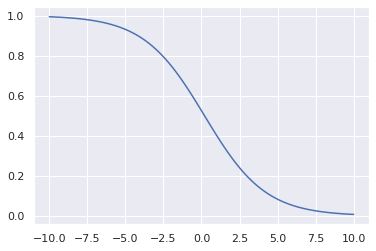

In [11]:
plt.plot(X,Y)
plt.show()

# Plotting 3d Sigmoid


In [0]:
from mpl_toolkits import mplot3d

In [0]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,50)

xx1, xx2 = np.meshgrid(x1,x2)

In [0]:
np.meshgrid?

In [15]:
xx1.shape

(50, 100)

In [16]:
xx2.shape

(50, 100)

In [0]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

xx1, xx2 = np.meshgrid(x1,x2)

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [19]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
w1 = 0.5
w2 = 0.5
b = 0

In [0]:
y = sigmoid_2d(xx1,xx2,w1,w2,b)

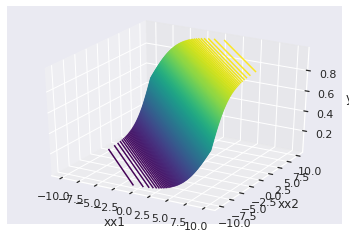

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xx1, xx2, y, 200, cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

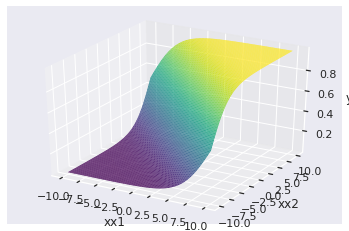

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2, y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

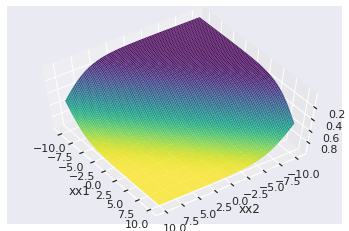

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2, y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

ax.view_init(300,35)

In [0]:
ax.view_init?

# Plotting Loss

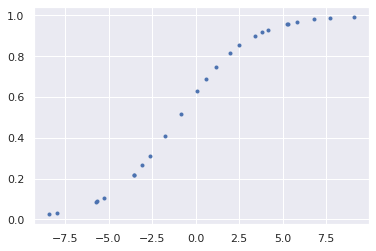

In [26]:
w_unknown = 0.5
b_unknown = 0.5

X = np.random.random(25)*20-10
Y = sigmoid(X,w_unknown, b_unknown)

plt.plot(X,Y,'.')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x,w_est,b_est))**2
  return loss

In [0]:
w = np.linspace(0,2,100)
b = np.linspace(-1,1,100)

ww,bb = np.meshgrid(w,b)
loss = np.zeros(ww.shape)

In [0]:
for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    loss[i,j] = calculate_loss(X,Y,ww[i,j],bb[i,j])

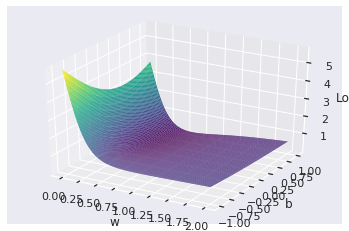

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

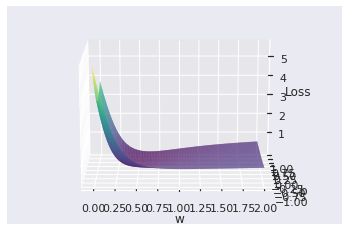

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(15,270)

In [32]:
ij = np.argmin(loss)
print(ij)

i = int(np.floor(ij/loss.shape[1]))
j = int(ij - i*loss.shape[1])

i,j

7425


(74, 25)

In [33]:
ww[i,j],bb[i,j]

(0.5050505050505051, 0.49494949494949503)

# Contour plot

In [0]:
import matplotlib.colors

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","violet","blue"])

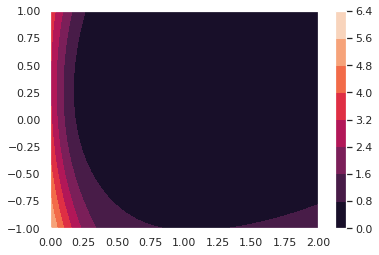

In [36]:
plt.contourf(ww,bb,loss)
plt.colorbar()
plt.show()

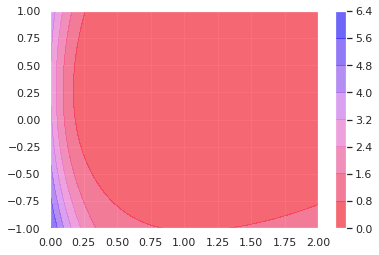

In [37]:
plt.contourf(ww,bb,loss,cmap=my_cmap,alpha=0.6)
plt.colorbar()
plt.show()

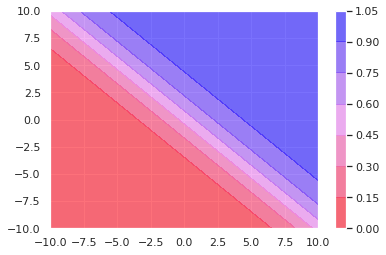

In [38]:
plt.contourf(xx1,xx2,y,cmap=my_cmap,alpha=0.6)
plt.colorbar()
plt.show()

# Sigmoid Class

In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-(self.perceptron(x))))

  def grad_w(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred-y)*(y_pred)*(1-y_pred)*x
  
  def grad_b(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred-y)*(y_pred)*(1-y_pred)

  def fit(self,X,Y,epochs = 1,learning_rate = 1, initialise = True):
    self.w = np.random.randn(1, X.shape[1])
    self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw-=self.grad_w(x,y)
        db-=self.grad_b(x,y)
      
      self.w = learning_rate*dw
      self.b = learning_rate*db


# Fitting for Toy Data

In [0]:
sn = SigmoidNeuron()
# X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])

# Corrected Points (Linearly Separable)
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = np.asarray([1,1,1,0,0,0])

sn.fit(X,Y)

In [60]:
print(sn.w,sn.b)

[ 1.12976653 -0.11160388] [0.01359934]


In [42]:
#Running a loop for fitting the model on the toy data using single loop statements

for i in range(50):
  if i==0:
    sn.fit(X,Y,1,0.25,True)
  else:
    sn.fit(X,Y,1,0.25,False)
  print(sn.w,sn.b)

[ 0.00350823 -0.00912544] [0.00118025]
[-0.02267326 -0.26047248] [0.00550819]
[ 0.0322196  -0.38126338] [-0.00785745]
[ 0.18154133 -0.01271351] [0.05293947]
[-0.0330126   0.01467198] [-0.00775948]
[ 0.07503567 -0.25057877] [0.02789211]
[-0.0050351  -0.10252821] [-0.00218019]
[-0.04238924  0.0148552 ] [-0.01041343]
[-0.00161903 -0.17945169] [-0.01210073]
[-0.06188945 -0.34020608] [-0.0156796]
[0.00938109 0.03590807] [0.00712422]
[ 0.0363072 -0.0057789] [0.00946437]
[ 0.00224456 -0.2107962 ] [-0.01237406]
[ 0.01876748 -0.00417182] [0.00517109]
[-0.00049728 -0.19746185] [0.00967275]
[-0.13557974 -0.26937223] [-0.06571439]
[-0.11309529 -0.35249795] [-0.06322055]
[ 0.00603667 -0.37617455] [-0.01091305]
[ 0.14785376 -0.03645649] [0.03702415]
[ 0.08978942 -0.07009574] [0.01817946]
[ 0.18763194 -0.0172857 ] [0.05654923]
[ 0.05913205 -0.01280494] [0.01506292]
[-0.00059551 -0.02354807] [-0.00189185]
[ 0.1329715  -0.04283049] [0.03209341]
[ 0.00032604 -0.01491638] [0.0020403]
[-0.06809832 -0.1092

In [0]:
x1_toplot = np.linspace(-10,10,100)
x2_toplot = np.linspace(-10,10,100)

xx1_toplot,xx2_toplot = np.meshgrid(x1_toplot,x2_toplot)
y_toplot = sigmoid_2d(xx1_toplot,xx2_toplot,sn.w[0],sn.w[1],sn.b)

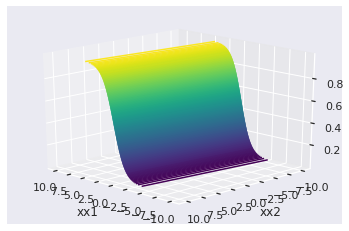

In [62]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xx1_toplot, xx2_toplot, y_toplot, 200, cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

ax.view_init(20,135)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [0]:
a = X[:,0]
b = X[:,1]
labels_toplot = Y
colors = ['black','white']

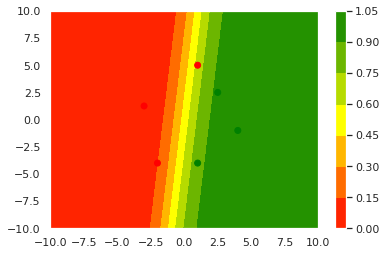

In [66]:
plt.contourf(xx1_toplot,xx2_toplot,y_toplot,cmap=my_cmap)
plt.colorbar()
# plt.scatter(a,b,c=labels_toplot, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a,b,c=Y,cmap=my_cmap)
plt.show()

In [0]:
def plot_sn(X,Y,sn,ax):

  
  X1 = np.linspace(-8,8,100)
  X2 = np.linspace(-8,8,100)

  XX1,XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)

  for i in range(X2.size):
    for j in range(X1.size):
      val = [X1[j],X2[i]]
      YY[i,j] = sn.perceptron(val)
    
  ax.contourf(XX1,XX2,YY,cmap = my_cmap)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()

[0.11902301 0.14753701] [0.02161892]
[0.09652228 0.11671021] [-0.00514227]
[ 0.03047671 -0.04008891] [0.00135792]
[ 0.06444595 -0.058407  ] [0.01267775]
[ 0.05405308 -0.00912398] [0.00629561]
[ 0.11513329 -0.03480931] [-0.00816691]
[ 0.08817854 -0.04490936] [-0.00561665]
[ 0.02859414 -0.00313939] [0.00182812]
[ 0.18671961 -0.13390351] [0.0078367]
[0.03655233 0.00111237] [0.00419523]
[0.09381234 0.07135961] [0.01037678]
[ 0.17483863 -0.15453135] [0.0074295]
[ 0.02637672 -0.00354244] [-0.01871542]
[ 0.01152047 -0.0466291 ] [0.01149913]
[ 0.11806556 -0.13351483] [0.00551797]
[ 0.07404577 -0.02845076] [-0.01210016]
[ 0.15747265 -0.02965033] [-0.00028093]
[ 0.04760706 -0.09853735] [0.00749781]
[0.07941657 0.09578405] [0.01123909]
[0.08250972 0.09821944] [0.01037041]


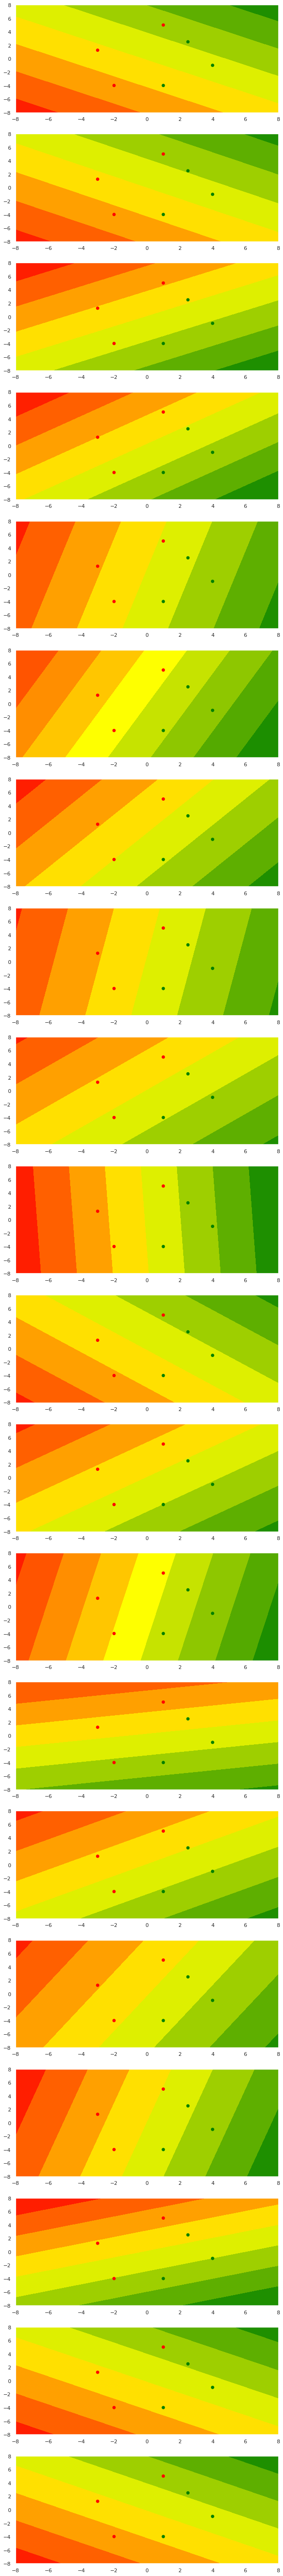

In [83]:
#Running a loop for fitting the model on the toy data using single loop statements

N = 20
plt.figure(figsize=(10,N*5))
for i in range(N):
  
  if i==0:
    sn.fit(X,Y,1,0.25,True)
  else:
    sn.fit(X,Y,1,0.15,False)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  print(sn.w,sn.b)